In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
file_path = '/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK2-wafer map /LSWMD.pkl'

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import os 
import warnings


In [42]:
df = pd.read_pickle(file_path)
df.info()
# waferMap : 웨이퍼 맵 이미지 배얄
# IotName : 동일한 조건하에 만들어진 균일한 특성을 갖는 제품군
# dieSize: 칩 wafer 상에서 면적
# waferIndex : ??
# trainTestLabel : train vs test
# failure Type : classify할 label 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


#EDA

In [43]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [44]:
df.sample

<bound method NDFrame.sample of                                                  waferMap  ...    failureType
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...       [[none]]
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...       [[none]]
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...       [[none]]
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...       [[none]]
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...       [[none]]
...                                                   ...  ...            ...
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...  [[Edge-Ring]]
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...  ...   [[Edge-Loc]]
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...  [[Edge-Ring]]
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...  ...             []
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...             []

[811457 rows x 6 columns]>

In [45]:
df.isnull().sum() # missing value 있는 지 여부 --> 없는 거 확인

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64

In [46]:
df.memory_usage()

Index                 128
waferMap          6491656
dieSize           6491656
lotName           6491656
waferIndex        6491656
trianTestLabel    6491656
failureType       6491656
dtype: int64

In [47]:
# # df['failureType'].value_counts()
# df['failureType'].value_counts(normalize = True).plot.bar()
# plt.show()
# # ax = df.plot(kind='bar')

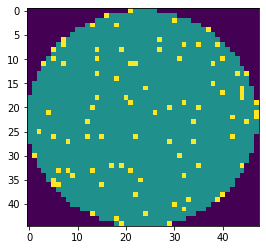

In [48]:
plt.imshow(df.iloc[0][0])

### diesize distribution


count    811457.000000
mean       1840.998585
std        2254.987374
min           3.000000
25%         710.000000
50%         953.000000
75%        1902.000000
max       48099.000000
Name: dieSize, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


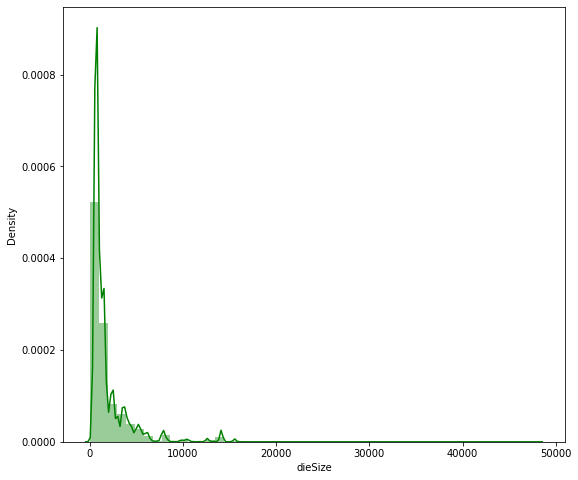

In [49]:
import seaborn as sns
print(df['dieSize'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['dieSize'], color='g');

### WaferMap.shape

In [50]:
def average_tuple(nums):
    result = [sum(x) / len(x) for x in zip(*nums)]
    return result

x= []
for i in range(811456):
    x.append(df.iloc[i][0].shape)

print("Average value of waferMap's shape : {0}".format(average_tuple(x)))

Average value of waferMap's shape : [45.05965819465258, 43.120193824434104]


In [51]:
def std_tuple(nums):
    sum_tuple = [(sum(x) - 44)**2 for x in zip(*nums)]
    result = []
    for item in sum_tuple:
        var = item / 811456
        result.append(var ** (0.5))
    return result

print("std value of waferMap's shape : {0}".format(std_tuple(x)))

std value of waferMap's shape : [40590.075422517606, 38842.98938250523]


### WaferIndex Distribution

In [52]:
# np.unique -> 개수 셀 수 있음
uni_index=np.unique(df.waferIndex, return_counts=True)
uni_index

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 array([32516, 32663, 32621, 32714, 32701, 32745, 32672, 32650, 32636,
        32586, 32637, 32598, 32381, 32353, 32301, 32362, 32333, 32333,
        32285, 32290, 32320, 32312, 32202, 32197, 32049]))

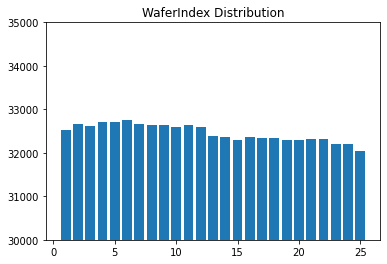

In [53]:
plt.bar(uni_index[0],uni_index[1], align='center', label = 'waferIndex')
plt.ylim(30000,35000)
plt.title('WaferIndex Distribution')
plt.show()

### failureType Distribution

In [54]:
# 앞으로도 참고!

df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py:1985: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [55]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]],3,1
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]],2,1
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]],3,1
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[],[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[],[],[]


In [56]:
df_None =df[(df['failureNum']==8)] 
df_None = df_None.reset_index()
df_None

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,0
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,0
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,0
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,0
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,0
...,...,...,...,...,...,...,...,...,...
147426,811438,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,9.0,[[Test]],[[none]],8,1
147427,811439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,10.0,[[Test]],[[none]],8,1
147428,811442,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",600.0,lot47542,13.0,[[Test]],[[none]],8,1
147429,811445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,16.0,[[Test]],[[none]],8,1


In [57]:
df_pattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_pattern = df_pattern.reset_index()
df_pattern

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,[[Training]],[[Loc]],4,0
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,[[Training]],[[Edge-Loc]],2,0
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,[[Training]],[[Edge-Loc]],2,0
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,[[Training]],[[Edge-Loc]],2,0
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,[[Training]],[[Edge-Loc]],2,0
...,...,...,...,...,...,...,...,...,...
25514,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]],2,1
25515,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]],2,1
25516,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]],3,1
25517,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]],2,1


In [58]:
df_all = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_all = df_all.reset_index()
df_all

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,0
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,0
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,0
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,0
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,0
...,...,...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]],2,1
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]],2,1
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]],3,1
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]],2,1


In [59]:
len(df_all.index)

172950

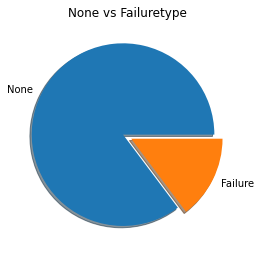

In [60]:
# no-label vs label
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(1,2,1)
explode = [0.05, 0.05]
labels = ["None", "Failure"]
ratio  = [len(df_None.index),len(df_pattern.index)]
plt.pie(ratio, explode=explode, labels= labels, shadow=True)
plt.title("None vs Failuretype")
plt.show()

In [61]:
# label distribution
failure_types = np.unique(df_pattern.failureNum, return_counts= True)
failure_types

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=object),
 array([4294,  555, 5189, 9680, 3593,  866, 1193,  149]))

In [62]:
failure_types[1][0]

4294

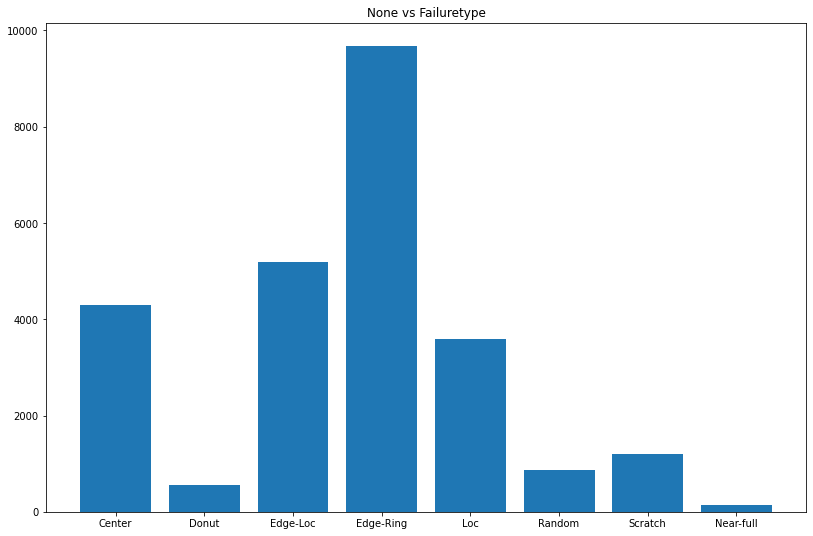

In [63]:
fig = plt.figure(figsize=(30,9))
ax1 = fig.add_subplot(1,2,1)

labels = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
value = [failure_types[1][0], failure_types[1][1], failure_types[1][2], failure_types[1][3], failure_types[1][4], failure_types[1][5], failure_types[1][6], failure_types[1][7]]
plt.bar(labels,value,)
plt.title("None vs Failuretype")
plt.show()

### Show some waferMap image

In [64]:
df_center =df[(df['failureNum']==0)] 
df_center = df_center.reset_index()

df_Donut =df[(df['failureNum']==1)] 
df_Donut = df_Donut.reset_index()

df_edge_loc =df[(df['failureNum']==2)] 
df_edge_loc = df_edge_loc.reset_index()

df_edge_ring =df[(df['failureNum']==3)] 
df_edge_ring = df_edge_ring.reset_index()

df_loc =df[(df['failureNum']==4)] 
df_loc = df_loc.reset_index()

df_random =df[(df['failureNum']==5)] 
df_random = df_random.reset_index()

df_scratch =df[(df['failureNum']==6)] 
df_scratch = df_scratch.reset_index()

df_near_full =df[(df['failureNum']==7)] 
df_near_full = df_near_full.reset_index()

In [65]:
df_center.waferMap[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Text(0.5, 1.0, 'near_full')

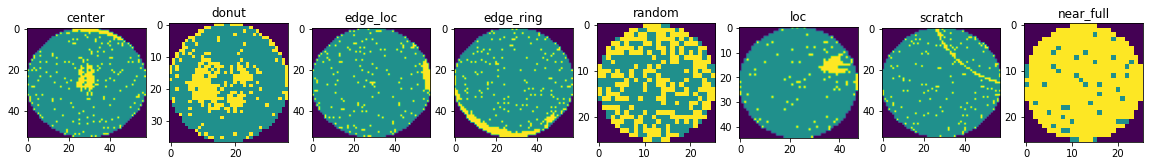

In [66]:
rows = 1
columns = 8
fig = plt.figure(figsize= (20,20))

fig.add_subplot(rows, columns, 1)
plt.imshow(df_center.waferMap[0])
plt.title('center')

fig.add_subplot(rows, columns, 2)
plt.imshow(df_Donut.waferMap[0])
plt.title('donut')

fig.add_subplot(rows, columns, 3)
plt.imshow(df_edge_loc.waferMap[0])
plt.title('edge_loc')

fig.add_subplot(rows, columns, 4)
plt.imshow(df_edge_ring.waferMap[0])
plt.title('edge_ring')

fig.add_subplot(rows, columns, 5)
plt.imshow(df_random.waferMap[0])
plt.title('random')

fig.add_subplot(rows, columns, 6)
plt.imshow(df_loc.waferMap[0])
plt.title('loc')

fig.add_subplot(rows, columns, 7)
plt.imshow(df_scratch.waferMap[0])
plt.title('scratch')

fig.add_subplot(rows, columns, 8)
plt.imshow(df_near_full.waferMap[0])
plt.title('near_full')